# A1: Logic and lambda calculus

Simon Dobnik and Robin Cooper

The lab is an exploration and learning exercise to be done in a group and also in discussion with the teachers and other students.

Before starting, please read the instructions on how to work in groups on Canvas.

Write all your answers and the code in the appropriate boxes below.

*Important*: We recommend that you create a virtual environment (either with virtualenv or conda), install Jupyter Lab in it and all dependencies used in the assignment.
To run Jupyter Lab later within your environment, run the following command:

```python -m ipykernel install --user --name=my-virtualenv-name```,

where you replace `my-virtualenv-name` with the name of your created environment.
Once in Jupyter, choose the kernel with the name of your environment. You can do it by either (i) using the drop-down menu in the top right corner or (ii) going to the top menu -> Kernel -> Change Kernel.

## Translating English to logic and evaluating logic in a model

In [1]:
# This task needs NLTK and Jupyter Lab (IPython package).
# Ref: https://www.nltk.org/howto/semantics.html
import nltk
from utils import display_latex, display_translation, display_tree, display, Markdown
read_expr = nltk.sem.Expression.fromstring

### 1. Propositional logic
Translate the following sentences into **propositional logic** and verify that they parse with Expression.fromstring() (`read_expr` variable in the cell above). Provide a key which shows how the propositional variables in your translation correspond to expressions of English. Briefly discuss any difficulties you encounter. (By difficulties we mean cases where the semantics of English expressions cannot be expressed to the same degree by the semantics of your logic representations, i.e. they do not mean the same). **[5 + 1 marks]**

In [2]:
# p  "Alex plays the piano"
# q  "Alex is smart"
# r  "Alex is musical"
# s  "Lydia is happy"
# t  "George plays the piano"
# u  "George is musical"

propositions = {
    "If Alex plays the piano, she is smart.":
    read_expr('p -> q'),
    
    "Alex is both smart and musical.":
    read_expr('q & r'),
    
    "If Alex is not smart, Lydia is not happy.":
    read_expr('-q -> -s'),
    
    "If Alex or George plays the piano, they are musical.":
    read_expr('(p -> r) | (t -> u)'),

    "George plays the piano.":
    read_expr('t'),
}

for text, semrep in propositions.items():
    display_translation(text, semrep)

"If Alex plays the piano, she is smart.": $(p\ \rightarrow\ q)$

"Alex is both smart and musical.": $(q\ \land\ r)$

"If Alex is not smart, Lydia is not happy.": $(-q\ \rightarrow\ -s)$

"If Alex or George plays the piano, they are musical.": $((p\ \rightarrow\ r)\ \lor\ (t\ \rightarrow\ u))$

"George plays the piano.": $t$

*Difficulties encounter:*

There exists semantic ambuiguity in Sentence 4, i.e., how to interpret "If Alex or George plays the piano, they are musical".
The ambiguity arises from the interpretation of the phrase "they are musical."
The pronoun "they" can refer to either "Alex" alone, "George" alone, or both "Alex and George" collectively. Thus, the sentence could be interpreted as:

a. If Alex plays the piano, she is musical.

b. If George plays the piano, he is musical.

c. If either Alex or George plays the piano, they are musical (referring to both Alex and George).

Collective Interpretation: Considering the context, the sentence might be interpreted collectively, implying that if either Alex or George plays the piano, both of them are considered musical.

Individual Interpretation: Alternatively, it could be interpreted individually, implying that if either Alex or George plays the piano, only the one who plays is considered musical.

Which one? We prefer the individual one, which is more intuitively logical. => Bill's feedback: Both are rational, and he also prefers the individual interpretation.

### 2. Valuation of Propositional logic

Imagine that we observe a world where 
- (i) Alex does not play the piano,
- (ii) Alex and Lydia are smart and musical,
- (iii) George is not musical,
- (iv) Lydia is happy,
- (v) George plays the piano. 

Translate this informal description of the world into a model by appropriately defining an evaluation function and evaluate the formulae from Question 1 in this model. Briefly comment the answers you get. **[5 + 1 marks]**.

In [3]:
# Define the model based on the observations
val = nltk.Valuation([('p', False), ('q', True), ('r', True),('s', True), ('t', True), ('u', False)])

dom = set()
g = nltk.Assignment(dom)

m = nltk.Model(dom, val) # initialize a model m that uses val

# Evaluate formulas in the model
for text, semrep in propositions.items():
    result = m.evaluate(str(semrep), g)
    print(f"{text}: {result}")

If Alex plays the piano, she is smart.: True
Alex is both smart and musical.: True
If Alex is not smart, Lydia is not happy.: True
If Alex or George plays the piano, they are musical.: True
George plays the piano.: True


*Comments:*

When I source propositions directly, it reported: AttributeError: 'ImpExpression' object has no attribute 'rstrip', so I use str() to restore the string;

It can be observed that defining the valuation in propositional logic can be verbose.

### 3. Predicate logic *without quantifiers*

Translate the following sentences into predicate-argument formulae of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [4]:
sentences1 = {
    "Lydia likes George but Lydia doesn't like Alex": 
    read_expr(r'likes(Lydia, George) & -likes(Lydia, Alex)'),
    
    "Lydia likes herself and so does George":
    read_expr(r'likes(Lydia, Lydia) & likes(George, George)'),
    
    "Charlie is an English pianist who plays a sonata":
    read_expr(r'english(Charlie) & pianist(Charlie) & plays(Charlie, sonata)'),
    
    "Lydia and George admire each other":
    read_expr(r'admires(Lydia, George) & admires(George, Lydia)'),
}

for text, semrep in sentences1.items():
    display_translation(text, semrep)


"Lydia likes George but Lydia doesn't like Alex": $(likes(Lydia,George)\ \land\ -likes(Lydia,Alex))$

"Lydia likes herself and so does George": $(likes(Lydia,Lydia)\ \land\ likes(George,George))$

"Charlie is an English pianist who plays a sonata": $(english(Charlie)\ \land\ pianist(Charlie)\ \land\ plays(Charlie,sonata))$

"Lydia and George admire each other": $(admires(Lydia,George)\ \land\ admires(George,Lydia))$

*Difficulties encountered:* 

How to define the predicate and arguments?
e.g.,formalization and reusability

r'isEnglishPianist(Charlie) & plays(Charlie, sonata) => r'english(Charlie) & pianist(Charlie) & plays(Charlie, sonata)'

Also, the contrast "but" and the relation of the relative clause to the noun ("an English pianist WHO plays a sonata") are lost during the formalization.

### 4. First order logic with quantifiers

Translate the following sentences into quantified formulas of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [5]:
sentences2 = {
    "Charlie knows a woman who likes George":
    read_expr('exists x (knows(Charlie, x) & woman(x) & likes(x, George))'),
    
    "George admires everybody and Lydia admires nobody":
    read_expr('all y (person(y) -> admires(George, y)) & not exists z (person(z) & admires(Lydia, z))'),

    "Nobody admires everybody":
    read_expr('not exists x (person(x) & all y (person(y) -> admires(x, y)))'),
    
    "Exactly one musician plays everything Alex wrote":
    # read_expr('exists x (musician(x) & all y (wrote(Alex, y) -> plays(x, y)) & unique(x, musician(x)))'),
    read_expr('exists x (musician(x) & all y (wrote(Alex, y) -> plays(x, y))) & exists z (musician(z) & all y (wrote(Alex, y) -> plays(z, y)) -> z = x)')
}

for text, semrep in sentences2.items():
    display_translation(text, semrep)

"Charlie knows a woman who likes George": $\exists\ x.(knows(Charlie,x)\ \land\ woman(x)\ \land\ likes(x,George))$

"George admires everybody and Lydia admires nobody": $(\forall\ y.(person(y)\ \rightarrow\ admires(George,y))\ \land\ -\exists\ z.(person(z)\ \land\ admires(Lydia,z)))$

"Nobody admires everybody": $-\exists\ x.(person(x)\ \land\ \forall\ y.(person(y)\ \rightarrow\ admires(x,y)))$

"Exactly one musician plays everything Alex wrote": $(\exists\ x.(musician(x)\ \land\ \forall\ y.(wrote(Alex,y)\ \rightarrow\ plays(x,y)))\ \land\ \exists\ z.((musician(z)\ \land\ \forall\ y.(wrote(Alex,y)\ \rightarrow\ plays(z,y)))\ \rightarrow\ (z\ =\ x)))$

*Difficulties encountered:* 

Different interprentation methods between group members:

e.g., 
"Charlie knows a woman who likes George":
read_expr('knows(charlie, exists x. likes(x, george)) & woman(x)'),    

"George admires everybody and Lydia admires nobody":
read_expr('admires(george, all x.people(x))& -admires(lydia, exists x.person(s))'),

***but this solution results in wrong truth value, and with Bill's explanation, we know that the quantifier like "exists" should be put outside all the functions.


How to represent "exactly one"? Furthermore, how to define "unique" by set?
***solved in later discussion

***-> vs &: for "all" quantifier, "->" is commonly used, for "exists" quantifier, "&" is commonly used.

### 5. Valuation of first order logic

We observe a world with entities Lydia, George, Alex, Charlie and Bertie, sonata, etude, prelude, waltz, scherzo.

1. Lydia likes Lydia, George, Alex and Charlie. George likes Lydia, Bertie and George. Alex likes Alex. Charlie likes Lydia, George, Alex, Charlie and Bertie. Bertie likes Alex.
2. Lydia, George, Alex, Charlie and Bertie are English.
3. Charlie and Bertie are pianists.
4. Charlie plays a sonata, an etude and a waltz. Bertie plays a waltz and a scherzo. Lydia plays an etude, a prelude and a waltz.
5. Lydia admires Lydia, Charlie and Bertie. George admires Lydia, George, Alex, Charlie and Bertie. Alex admires Lydia, Alex and Bertie. Charlie admires George and Bertie. Bertie admires Lydia, George, Alex, Charlie and Bertie.
6. Lydia knows Lydia, George, Alex, Charlie and Bertie. George knows Lydia, George and Bertie. Alex knows Lydia, Alex and Bertie. Charlie knows George, Charlie and Bertie. Bertie knows Lydia, George, Alex, Charlie and Bertie.
7. Lydia, Alex and Charlie are women.
8. George and Bertie are men.
9. Alex wrote a sonata, an etude an a waltz.
10. Lydia, Alex, Charlie and Bertie are musicians.

Translate this informal description of the world into a model and evaluate the formulae from Questions 3 and 4 in this model. Briefly comment on the answers you get **[3 + 2 marks]**.

In [7]:
# entities = set(['p','t','e','h','r','s','u','l','w','c'])
entities = set(['g1', 'b1', 'g2', 'b2', 'g3', 'm1', 'm2', 'm3', 'm4', 'm5'])

assign = """
    Lydia => g1
    George => b1
    Alex => g2
    Charlie => b2
    Bertie => g3
    sonata => m1
    etude => m2
    prelude => m3
    waltz => m4
    scherzo => m5
    likes => {(g1, g1), (g1, b1), (g1, g2), (g1, b2),(b1, g1), (b1, g3), (b1, b1),(g2, g2),(b2, g1), (b2, b1), (b2, g2), (b2, b2), (b2, g3),(g3, g2)}
    english => {g1, b1, g2, b2, g3} 
    pianist => {b2, g3}
    plays => {(b2, m1), (b2, m2), (b2, m4),(g3, m4), (g3, m5),(g1, m2), (g1, m3), (g1, m4)}
    admires => {(g1, g1), (g1, b2), (g1, g3),(b1, g1), (b1, b1), (b1, g2), (b1, b2), (b1, g3),(g2, g1), (g2, g2), (g2, g3),(b2, b1), (b2, g3),(g3, g1), (g3, b1), (g3, g2), (g3, b2), (g3, g3)}
    knows => {(g1, g1), (g1, b1), (g1, g2), (g1, b2), (g1, g3),(b1, g1), (b1, b1), (b1, g3),(g2, g1), (g2, g2), (g2, g3),(b2, b1), (b2, b2), (b2, g3),(g3, g1), (g3, b1), (g3, g2), (g3, b2), (g3, g3)}
    woman => {g1, g2, b2}
    man => {b1, g3}
    wrote => {(g2, m1), (g2, m2), (g2, m4)}
    musician => {g1, g2, b2, g3}
    person => {g1, b1, g2, b2, g3}
"""
# To be correspondent with logic above,add an implicit predicate: person

val2 = nltk.Valuation.fromstring(assign)

g2 = nltk.Assignment(entities)
m2 = nltk.Model(entities, val2)

# sentences from question 3
for text, semrep in sentences1.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))

# sentences from question 4
for text, semrep in sentences2.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))


False


$(likes(Lydia,George)\ \land\ -likes(Lydia,Alex))$

----

True


$(likes(Lydia,Lydia)\ \land\ likes(George,George))$

----

True


$(english(Charlie)\ \land\ pianist(Charlie)\ \land\ plays(Charlie,sonata))$

----

False


$(admires(Lydia,George)\ \land\ admires(George,Lydia))$

----

True


$\exists\ x.(knows(Charlie,x)\ \land\ woman(x)\ \land\ likes(x,George))$

----

False


$(\forall\ y.(person(y)\ \rightarrow\ admires(George,y))\ \land\ -\exists\ z.(person(z)\ \land\ admires(Lydia,z)))$

----

False


$-\exists\ x.(person(x)\ \land\ \forall\ y.(person(y)\ \rightarrow\ admires(x,y)))$

----

True


$(\exists\ x.(musician(x)\ \land\ \forall\ y.(wrote(Alex,y)\ \rightarrow\ plays(x,y)))\ \land\ \exists\ z.((musician(z)\ \land\ \forall\ y.(wrote(Alex,y)\ \rightarrow\ plays(z,y)))\ \rightarrow\ (z\ =\ x)))$

----

In [8]:
# print(m2)

In [9]:
# display(g2)

In [10]:
# print(m2.evaluate("not exists x (person(x) & all y (person(y) -> admires(x, y)))", g2))

*Comments on the answers:* 

When I ran the code cell initially, it reported Undefined mostly;

So I try to optimize the pre-written predicate logic from question 3&4 to keep the correspondence...still unspecified. Why?

Adding the assignment of the entities works; only the last sentence with "exactly one" remained undefined.

To slove the issue, I try to apply logic like this: *exists x (musician(x) & exists y (musician(y) -> y = x))* equals *unique(x, musician(x))*

***Bill recommended a general rule: using a lowercase character(number optional) to represent entities.

## Lambda calculus

In [11]:
from nltk.grammar import FeatureGrammar

### 6. Function application and $\beta$-reduction
In the following examples some code has been deleted and replaced with `<????>`. What has been deleted? Verify that your answer is correct. **[4 marks]**

In [12]:
e1 = read_expr(r'\x.like(pip,rob)')
e2 = read_expr(r'pip')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result like(pip,rob).
display_latex(read_expr(r"like(pip,rob)"))

e1 = read_expr(r'\x.play(pip,scherzo)')
e2 = read_expr(r'\x.play(x,scherzo)') 
e3 = nltk.sem.ApplicationExpression(e1,e2)
display_latex(e3.simplify())
# with result play(pip,scherzo).
display_latex(read_expr(r"play(pip,scherzo)"))

e1 = read_expr(r'\P.exists x.(woman(x) & P(x))')
e2 = read_expr(r'\x.play(x,etude)') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result exists x.(woman(x) & play(x,etude)).
display_latex(read_expr(r"exists x.(woman(x) & play(x,etude))"))

e1 = read_expr(r'\P.\x.all z2.(musician(z2) -> like(x,z2))')
e2 = read_expr(r'\P.all x. (musician(x) -> P(x))') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result \x.all z2.(musician(z2) -> like(x,z2)).
display_latex(read_expr(r"\x.all z2.(musician(z2) -> like(x,z2))"))

$like(pip,rob)$

$like(pip,rob)$

$play(pip,scherzo)$

$play(pip,scherzo)$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \rightarrow\ like(x,z_{2}))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \rightarrow\ like(x,z_{2}))$

### 7. Extending the grammar

Extend the grammar simple_sem.fcfg that comes with NLTK `(~/nltk_data/grammars/book_grammars/)` so that it will cover the following sentences:

- no man gives a bone to a dog **[4 marks]**
- no man gives a bone to the dog **[4 marks]**
- a boy and a girl chased every dog **[2 marks]**
- every dog chased a boy and a girl **[2 marks]**
- a brown cat chases a white dog **[4 marks]**

The last example includes adjectives. Several different kinds of adjectives are discussed in the literature [(cf. Kennedy, 2012)](http://semantics.uchicago.edu/kennedy/docs/routledge.pdf). In this example we have an intersective adjective. The denotiation we want for "brown cat" is a a set that we get by intersecting the set of individuals that are brown and the set of individuals that are cats.

C. Kennedy. Adjectives. In G. Russell, editor, The Routledge Companion to Philosophy of Language, chapter 3.3, pages 328–341. Routledge, 2012.

The original grammar is included in the code below as a string.

In [13]:
                                                                                                                                                                                fcfg_string_orginal = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
"""

Write your extension of this grammar here:

In [14]:
## hints
# Det[???] -> ???
# TV[???] -> ???
# TV[???] -> ???
# CONJ -> ???
# NP[???] -> NP[???] CONJ NP[???]
# N[???] -> ???
# ADJ[???] -> ???
# NP[???] -> Det[???] ADJ[???] Nom[???]

fcfg_string = fcfg_string_orginal + r"""
Det[SEM=<\P Q.-exists x.(P(x) & Q(x))>] -> 'no'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'the'

NP[NUM=?n, SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
Nom[NUM=?n,SEM=<?adj(?nom)>] -> ADJ[NUM=?n,SEM=?adj] N[NUM=?n,SEM=?nom]
NP[SEM=<?det1(?nom1) & ?det2(?nom2)>] -> Det[NUM=?n1,SEM=?det1] Nom[NUM=?n1,SEM=?nom1] CONJ Det[NUM=?n2,SEM=?det2] Nom[NUM=?n2,SEM=?nom2]



TV[NUM=?n,SEM=<\X x.X(\ y.chase(x,y))>,TNS=past] -> 'chased'

CONJ -> 'and'

N[NUM=sg,SEM=<\x.cat(x)>] -> 'cat'
ADJ[NUM=sg,SEM=<\P.P(brown)>] -> 'brown'
ADJ[NUM=sg,SEM=<\P.P(white)>] -> 'white'
"""

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

Run the code below without errors:

----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{2}.(dog(z_{2})\ \land\ \exists\ z_{1}.(bone(z_{1})\ \land\ give(x,z_{1},z_{2}))))$

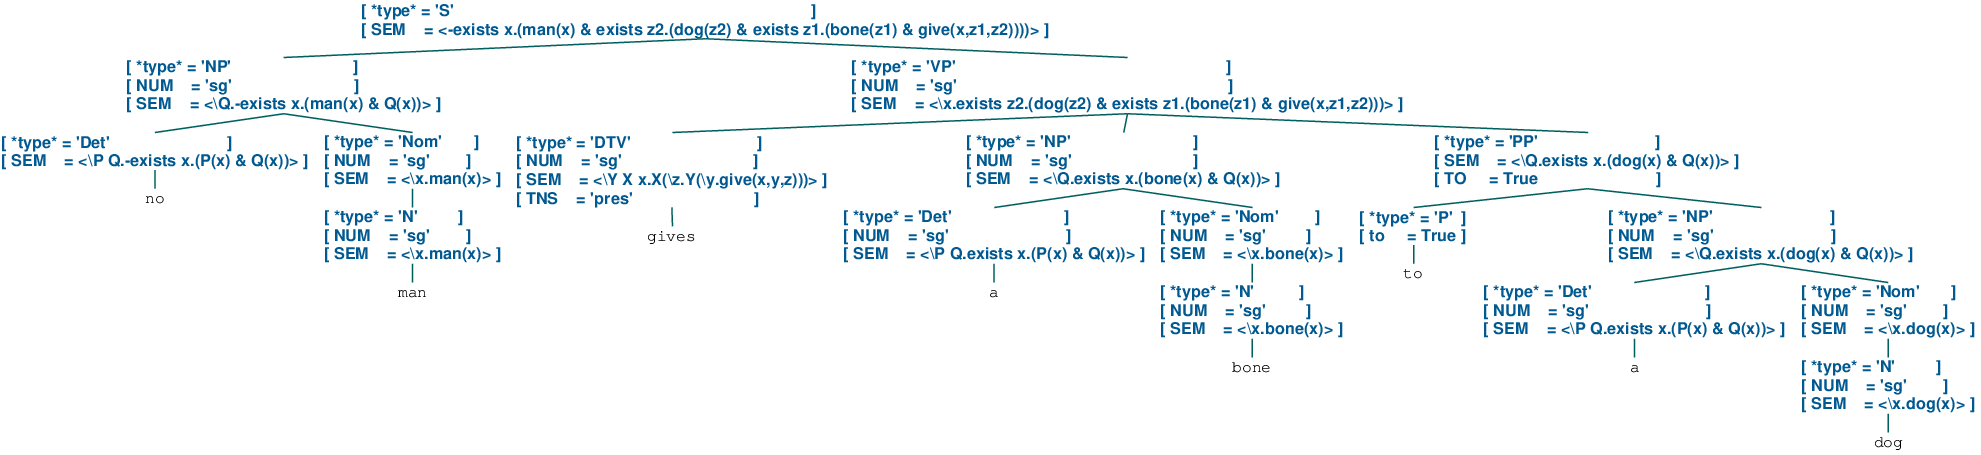

----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{4}.(dog(z_{4})\ \land\ \exists\ z_{3}.(bone(z_{3})\ \land\ give(x,z_{3},z_{4}))))$

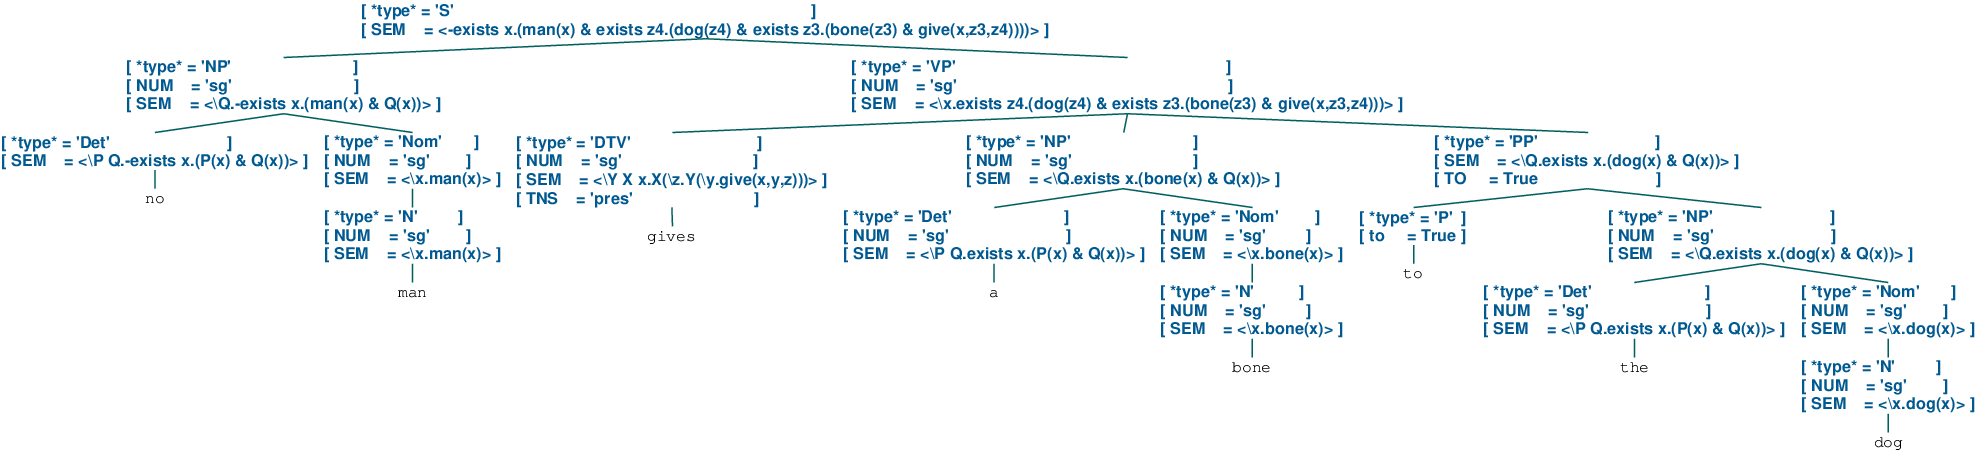

----

$(\lambda\ Q.\exists\ x.(boy(x)\ \land\ Q(x))\ \land\ \lambda\ Q.\exists\ x.(girl(x)\ \land\ Q(x)))(\lambda\ x.\forall\ z_{5}.(dog(z_{5})\ \rightarrow\ chase(x,z_{5})))$

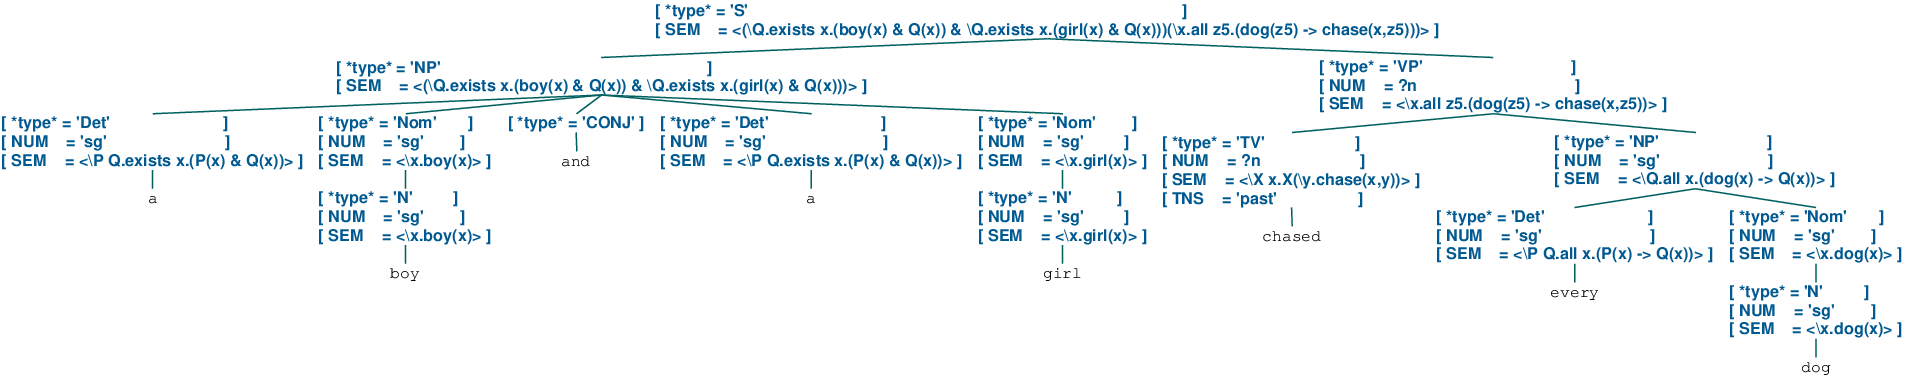

----

$\forall\ x.(dog(x)\ \rightarrow\ (\lambda\ Q.\exists\ x.(boy(x)\ \land\ Q(x))\ \land\ \lambda\ Q.\exists\ x.(girl(x)\ \land\ Q(x)))(\lambda\ y.chase(x,y)))$

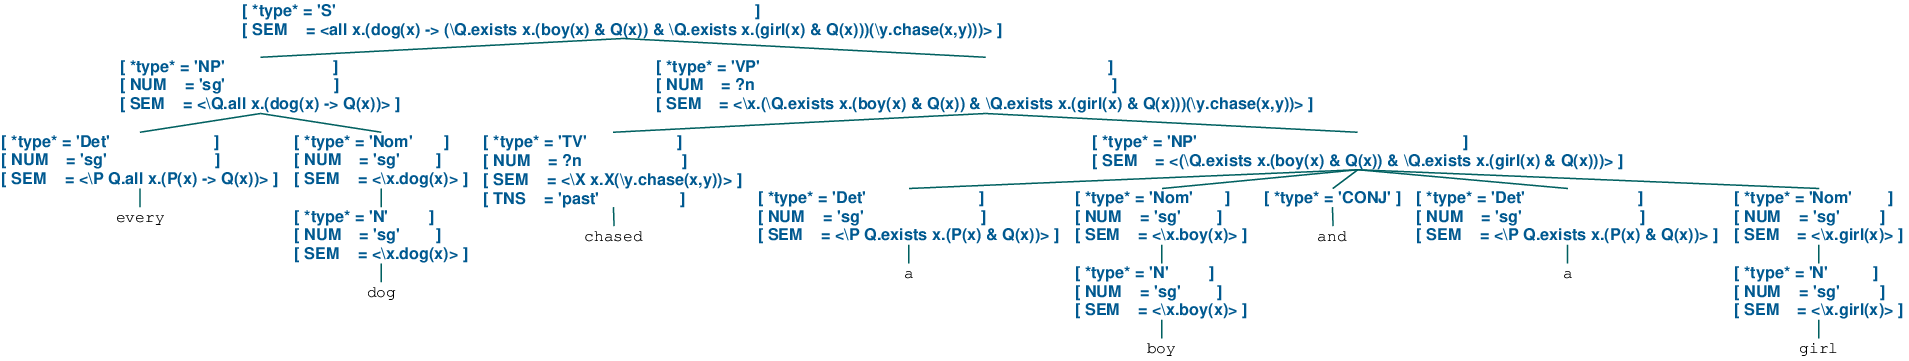

----

$\exists\ x.(cat(brown,x)\ \land\ \exists\ z_{7}.(dog(white,z_{7})\ \land\ chase(x,z_{7})))$

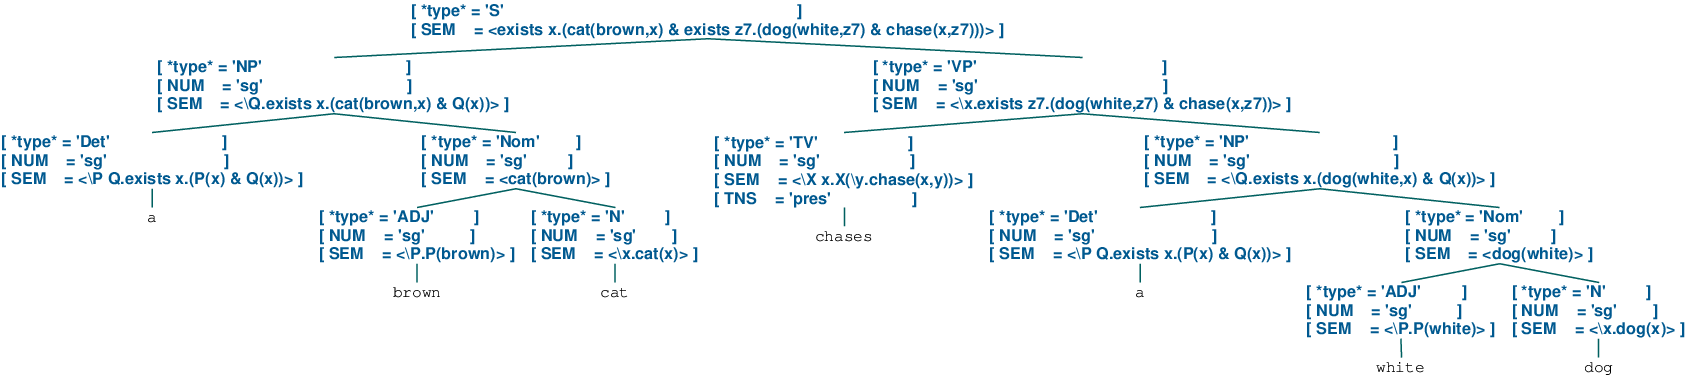

In [15]:
# comment out sentences if you couldn't find an answer for them
sentences = [
    'no man gives a bone to a dog',
    'no man gives a bone to the dog',
    'a boy and a girl chased every dog',
    'every dog chased a boy and a girl',
    'a brown cat chases a white dog',
]
for results in nltk.interpret_sents(sentences, syntax):
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree

In [16]:
# print(fcfg_string)

If you are working with iPython which is also running behind Jupyter notebooks and you are changing grammars and want to rerun a new version without restarting you may find `nltk.data.clear_cache()` useful.

## Statement of contribution

Briefly state how many times you have met for discussions, who was present, to what degree each member contributed to the discussion and the final answers you are submitting.

Group Members: Xiumei Xue, Tianyi Geng, Yiyi Wang, Xi Chen

We have met once for discussion and discussed online several times. Xiumei Xue has contributed the most by filling the codes for the majority of the assignment, Tianyi Geng contributed in organizing the assignment for handing in, and all members have contributed to the discussion and solutions for the assignment.

## Marks

The assignment is marked on a 7-level scale where 4 is sufficient to complete the assignment; 5 is good solid work; 6 is excellent work, covers most of the assignment; and 7: creative work. 

This assignment has a total of 47 marks. These translate to grades as follows: 1 = 17% 2 = 34%, 3 = 50%, 4 = 67%, 5 = 75%, 6 = 84%, 7 = 92% where %s are interpreted as lower bounds to achieve that grade.